# Policy 

In [30]:
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
import math

# Setup seaborn
sns.set_theme(style="ticks", rc={'text.usetex' : True})
sns.set_context("paper")

df = pd.read_csv("/Users/david/Nextcloud/Dokumente/Education/Uni Bern/Master Thesis/Analyzing Financial Climate Disclosures with NLP/Data/policy/policy_database.csv", parse_dates=['Year'])
# Remove "informal" types
df = df.query("`Gov resource` != 'Information'")
df.loc[df.Country == 'United Kingdom of Great Britain and Northern Ireland', "Country"] = 'U.K.'

## Trend of low-carbon financial policies over time

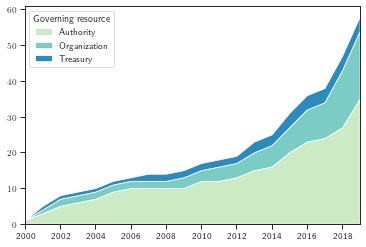

In [34]:
all_countries = df['Country'].unique()
gov_resources = df['Gov resource'].unique()
colors = sns.color_palette("GnBu", len(gov_resources))
start_date = min(df["Year"])
end_date = max(df["Year"])

date_range = pd.date_range(start=start_date , end=end_date  + relativedelta(years=1), freq="Y")

def get_data(df_input, filter_str, axis_list):
    result = []
    for year in date_range:
        year = year
        df_year = df_input.query(filter_str)
        year_cum = pd.crosstab([df_year["Country"]], df_year["Gov resource"], dropna=False)
        year_by_resource = year_cum.sum(axis=0).to_dict()
        year_by_country = year_cum.sum(axis=1).to_dict()
        result.append({
            'year': year,
            'total_active': year_cum.sum().sum(),
            **year_by_resource,
            **year_by_country,
        })
    return [date(i["year"].year, 1, 1) for i in result], [[i.get(r, 0) for i in result] for r in axis_list]

# Construct the data
x, y = get_data(df, "Year <= @year", gov_resources)

# Plot
fig, ax = plt.subplots()
plt.stackplot(x, y, labels=gov_resources, colors=colors)
plt.legend(title="Governing resource", loc='upper left')
plt.xlim(start_date, end_date)
plt.show()

fig.savefig('/Users/david/Nextcloud/Dokumente/Education/Uni Bern/Master Thesis/Analyzing Financial Climate Disclosures with NLP/Thesis/figures/fin_policies_trend.pdf', format='pdf', bbox_inches='tight')

In [35]:
def plot_country_grid(countries):
    rows = math.ceil(len(countries) / 4)
    fig, axs = plt.subplots(rows, 4, 
                            figsize=(12, 20 if rows > 2 else 4), 
                            sharex=False, 
                            sharey=True, 
                            # constrained_layout=True
                           )

    axs = axs.ravel()
    for idx, c in enumerate(countries):
        ax = axs[idx]
        x, y = get_data(df, f"Year <= @year & Country == '{c}'", gov_resources)
        ax.stackplot(x, y, labels=gov_resources, colors=colors)
        ax.set_ylim(0, 18)
        ax.set_xlim(date(2010, 1, 1), end_date)
        ax.title.set_text(c)

        for label in ax.xaxis.get_ticklabels()[::2]:
            label.set_visible(False)

        if idx == len(countries) - 1:
            handles, labels = ax.get_legend_handles_labels()
            fig.legend(handles, labels, title="Governing resource", loc='lower center', ncol=len(gov_resources))

    fig.subplots_adjust(bottom=0.05 if rows > 2 else 0.25)
    return fig

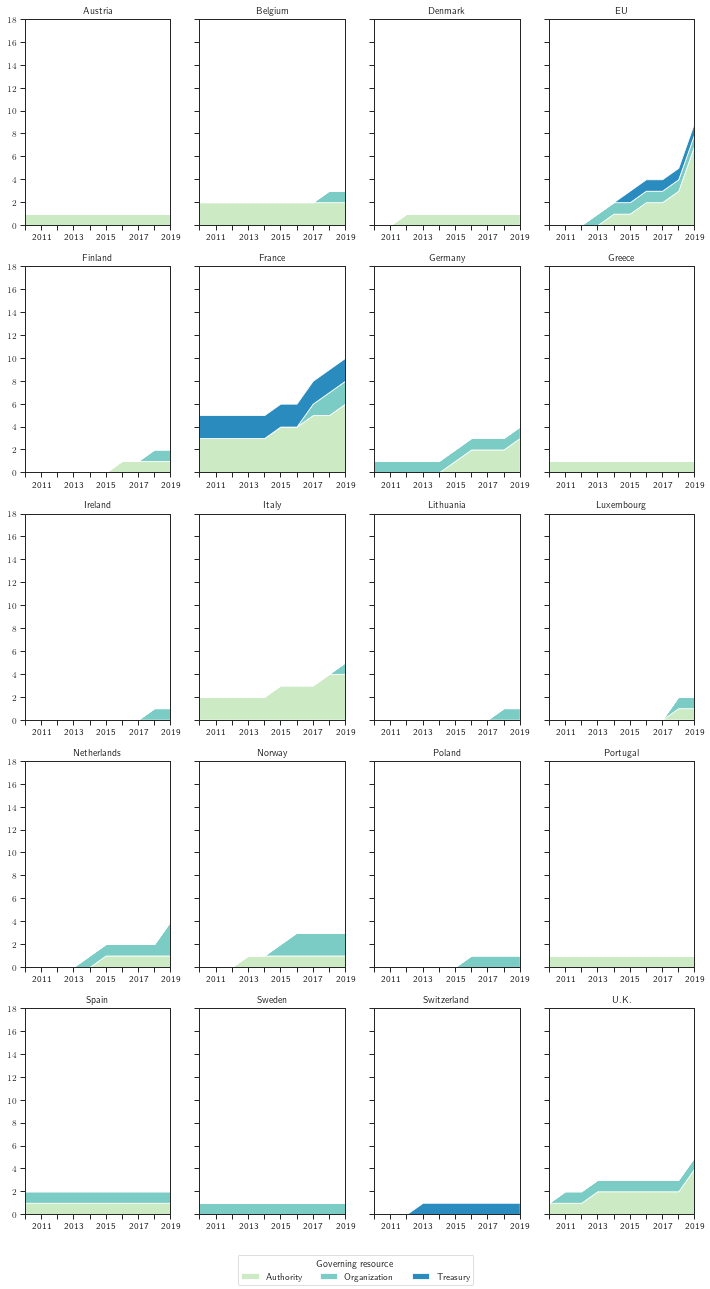

In [36]:
all_countries_fig = plot_country_grid(all_countries)
all_countries_fig.savefig('/Users/david/Nextcloud/Dokumente/Education/Uni Bern/Master Thesis/Analyzing Financial Climate Disclosures with NLP/Thesis/figures/fin_policies_countries_trend.pdf', format='pdf', bbox_inches='tight')

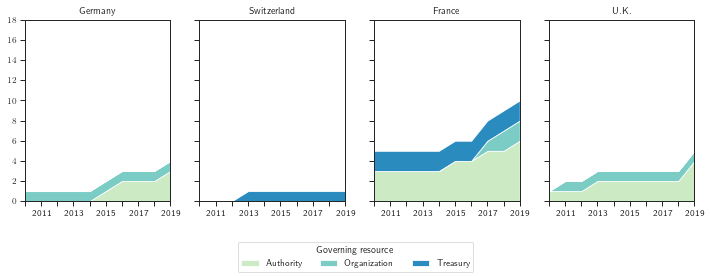

In [39]:
all_countries_fig = plot_country_grid(["Germany", "Switzerland", "France", "U.K."])
all_countries_fig.savefig('/Users/david/Nextcloud/Dokumente/Education/Uni Bern/Master Thesis/Analyzing Financial Climate Disclosures with NLP/Thesis/figures/fin_policies_selected_countries_trend.pdf', format='pdf', bbox_inches='tight')